# Noise Visualizatin

Visualize the effect of adding Gaussian noise on KDEF images.

In [2]:
import numpy as np
import pandas as pd
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

## Create custom noise transformation

In [4]:
from skimage.util import random_noise
# https://discuss.pytorch.org/t/how-to-add-noise-to-mnist-dataset-when-using-pytorch/59745
class GaussianNoise(object):
	def __init__(self, mean=0., var=1.):
		self.var = var
		self.mean = mean
        
	def __call__(self, tensor):
		return torch.tensor(random_noise(tensor, mode='gaussian', mean=self.mean, var=self.var, clip=True))
    
	def __repr__(self):
		return self.__class__.__name__ + f'(mean={self.mean}, var={self.var})'




# https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([
		# transforms.Resize(size=(224, 224)),
		
		
		# rotation augmentation
		# transforms.RandomRotation(10),
		# random flip augmentaion 
		# transforms.RandomHorizontalFlip(),
		# jitter brightness, contrast, saturation augmentaion
		# transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0),
		# convert from image to tensor (for pytorch)
		transforms.ToTensor(),
		# use ImageNet standard mean and std dev to normalize
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

		# add nosie after normalization to try to increase robustness and reduce overfitting
		# todo random variance from 0.1 to 0.5?
		GaussianNoise(mean=0, var=0.1)

])

# load KDEF straight face images
dataset = ImageFolder('data/face_images_80_10_10/train', transform=transform)

idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

print(idx_to_class)

{0: 'afraid', 1: 'angry', 2: 'disgusted', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprised'}


## Plot Sample Images in Dataset with  noise transofrmation applied
 (normalization not shown)


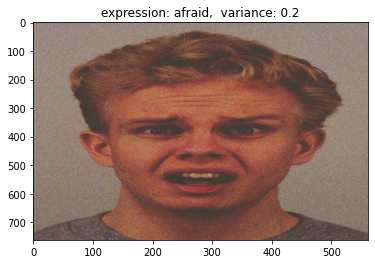

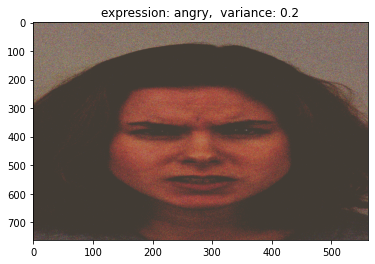

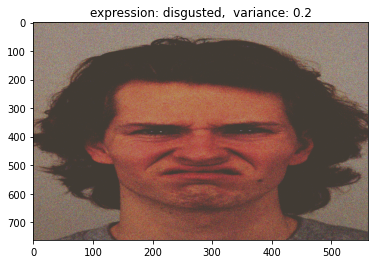

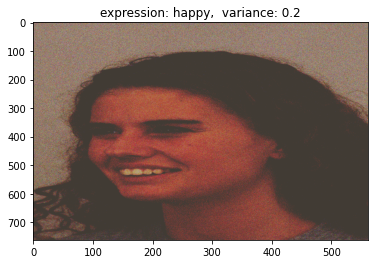

In [7]:
def imshow(img, label):
    inverse_normalize = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.255]
    )
    # undo normalization for viewing
    img = inverse_normalize(img)
    plt.imshow(transforms.ToPILImage()(img), aspect='auto')
    plt.title(f'expression: {label},  variance: 0.2')
    plt.show()

# afraid
sample_image, sample_target = dataset[450]
imshow(sample_image, idx_to_class[sample_target])

# angry
sample_image, sample_target = dataset[680]
imshow(sample_image, idx_to_class[sample_target])

# disgusted
sample_image, sample_target = dataset[1600]
imshow(sample_image, idx_to_class[sample_target])

# happy
sample_image, sample_target = dataset[1712]
imshow(sample_image, idx_to_class[sample_target])